# **Proyecto: Análisis de Datos para la Estrategia de Marketing Digital**

## Autora: Bianca Larrazabal Greppo

## Índice de Contenidos
1.  Objetivo de Negocio
2.  Conexión a Google Drive y Carga de Datos
3.  Exploración y Limpieza de Datos
4.  Ingeniería de Características (Feature Engineering)
5.  Análisis y Visualización
    * Gráfico 1: Evolución de Seguidores
    * Gráfico 2: Distribución de Métricas
    * Gráfico 3: Relación entre Vistas y Likes
    * Gráfico 4: Comparación de Métricas
    * Gráfico 5: Top 10 Publicaciones
    * Gráfico 6: Rendimiento por Tipo de Contenido
    * Gráfico 7: Engagement por Día de la Semana
    * Gráfico 8: Matriz de Correlación General


# **1.  Objetivo de Negocio**

El objetivo de este análisis es actuar como un consultor de marketing. A partir de sus datos de redes sociales de los últimos meses, buscamos responder preguntas clave para optimizar su estrategia digital:
* **¿Qué tipo de contenido genera mayor interacción?**
* **¿Qué días de la semana son los mejores para publicar?**
* **¿Cuál es la relación real entre el alcance (views) y la interacción (engagement)?**

El entregable final será un conjunto de **recomendaciones estratégicas accionables** basadas en datos.

# 2. **Conexión a Google Drive y Carga de Datos**

En esta primera sección, se conecta el cuaderno de Colab con Google Drive. Esto es necesario para poder leer el archivo `fake_data.csv` que se tiene guardado allí.

In [1]:
# Paso 1: Importar la herramienta 'drive' desde la librería 'google.colab'
# Esto da el comando necesario para conectar con Drive.
from google.colab import drive

# Paso 2: Ejecutar el comando para 'montar' o conectar Drive.
# Al ejecutar esto, Colab pedirá permiso para acceder a los archivos.
# Es un proceso seguro. Se debe seguir el enlace, iniciar sesión y pegar el código de autorización.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Se importa la librería pandas y se le da un apodo ('pd') para que sea más fácil de usar.
import pandas as pd

# Se guarda la ruta del archivo en una variable de texto.
ruta_del_archivo = '/content/drive/MyDrive/fake_data.csv'

# Se usa la función 'read_csv' de pandas para leer el archivo y cargarlo en una variable
# llamada 'df' (abreviatura de DataFrame, que es como pandas llama a las tablas).
df = pd.read_csv(ruta_del_archivo)

# El comando .head() muestra las primeras 5 filas la tabla.
print("¡Datos cargados con éxito! Aquí están las primeras 5 filas:")
print(df.head())

¡Datos cargados con éxito! Aquí están las primeras 5 filas:
         date  followers  likes  comments  shares  saves   views  impressions  \
0  2025-01-01      20623   2346       175      73    198   16051        29621   
1  2025-01-02      85318   2795       198      27    142   50103        69936   
2  2025-01-03      80129   3563       201     136    267   76103       144957   
3  2025-01-04      11462   1992       278      30    188   10954        21362   
4  2025-01-05      86444   1501        81      56     25  118791       125351   

    reach  engagement_rate (%)  
0   28257                13.54  
1   53736                 3.71  
2  126092                 5.20  
3   15259                21.71  
4   91229                 1.92  


## **3.  Exploración y Limpieza de Datos**

**Objetivo:** Entender la calidad de los datos y prepararlos para el análisis. Los datos "sucios" o mal formateados pueden arruinar un análisis.

In [5]:
# El comando .info() da un resumen completo:
# - El número de filas y columnas.
# - El nombre de cada columna.
# - Cuántos valores "no nulos" hay en cada una (útil para encontrar datos faltantes).
# - El tipo de dato (Dtype) de cada columna (número, texto, fecha, etc.).
print("Información técnica del DataFrame:")
df.info()

Información técnica del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 200 non-null    object 
 1   followers            200 non-null    int64  
 2   likes                200 non-null    int64  
 3   comments             200 non-null    int64  
 4   shares               200 non-null    int64  
 5   saves                200 non-null    int64  
 6   views                200 non-null    int64  
 7   impressions          200 non-null    int64  
 8   reach                200 non-null    int64  
 9   engagement_rate (%)  200 non-null    float64
dtypes: float64(1), int64(8), object(1)
memory usage: 15.8+ KB


In [6]:
# Se le dice a pandas que tome la columna 'date' y la convierta a un formato de fecha y hora.
# Luego, se sobreescribe la columna original con la nueva versión ya convertida.
df['date'] = pd.to_datetime(df['date'])

# Ahora, se vuelve a revisar la información para confirmar que el cambio se hizo.
print("Información después de convertir la columna 'date':")
df.info()

Información después de convertir la columna 'date':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 200 non-null    datetime64[ns]
 1   followers            200 non-null    int64         
 2   likes                200 non-null    int64         
 3   comments             200 non-null    int64         
 4   shares               200 non-null    int64         
 5   saves                200 non-null    int64         
 6   views                200 non-null    int64         
 7   impressions          200 non-null    int64         
 8   reach                200 non-null    int64         
 9   engagement_rate (%)  200 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(8)
memory usage: 15.8 KB


## **4**. **Ingeniería de Características (Feature Engineering)**

Para un análisis de marketing más profundo, se enriquece el conjunto de datos, creando dos nuevas columnas:

1.  `content_type`: se simula el tipo de contenido de cada publicación (Video, Imagen, Carrusel).
2.  `day_of_week`: se extrae el día de la semana de la fecha de publicación.

In [23]:
import numpy as np

# 1. Creación de la columna 'content_type'
# Se simula que se tienen 3 tipos de contenido y se asignan aleatoriamente.
# Esto permitirá analizar qué formato funciona mejor.
tipos_de_contenido = ['Video', 'Imagen', 'Carrusel']
df['content_type'] = np.random.choice(tipos_de_contenido, size=len(df), p=[0.4, 0.4, 0.2]) # 40% video, 40% imagen, 20% carrusel

# 2. Creación de la columna 'day_of_week'
# Se extrae el nombre del día de la semana de la columna 'date' que ya se limpió.
df['day_of_week'] = df['date'].dt.day_name()

# Se muestran las primeras filas para verificar las nuevas columnas
print("DataFrame con las nuevas columnas 'content_type' y 'day_of_week':")
df.head()

DataFrame con las nuevas columnas 'content_type' y 'day_of_week':


,date,followers,likes,comments,shares,saves,views,impressions,reach,engagement_rate (%),content_type,day_of_week
0,2025-01-01,20623,2346,175,73,198,16051,29621,28257,13.54,Video,Wednesday
1,2025-01-02,85318,2795,198,27,142,50103,69936,53736,3.71,Imagen,Thursday
2,2025-01-03,80129,3563,201,136,267,76103,144957,126092,5.20,Carrusel,Friday
3,2025-01-04,11462,1992,278,30,188,10954,21362,15259,21.71,Video,Saturday
4,2025-01-05,86444,1501,81,56,25,118791,125351,91229,1.92,Imagen,Sunday


## **5**. **Análisis y Visualización**

**Objetivo:** Hacerle preguntas a los datos y contar una historia con ellos a través de gráficos.

In [25]:
# Se obtiene un resumen estadístico de las columnas numéricas.
print("Resumen estadístico de los datos:")
df.describe()

Resumen estadístico de los datos:


,date,followers,likes,comments,shares,saves,views,impressions,reach,engagement_rate (%)
count,200,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,2025-04-10 12:00:00,50906.280000,5769.850000,593.845000,152.300000,307.910000,50750.685000,74254.51500,62665.530000,12.872400
min,2025-01-01 00:00:00,1397.000000,122.000000,10.000000,0.000000,2.000000,808.000000,861.00000,646.000000,1.530000
25%,2025-02-19 18:00:00,29372.000000,1957.500000,166.500000,26.750000,59.750000,23466.250000,32447.50000,28092.500000,7.915000
50%,2025-04-10 12:00:00,51514.500000,4584.000000,501.500000,73.000000,198.500000,49884.500000,69466.00000,57235.500000,12.755000
75%,2025-05-30 06:00:00,75092.750000,8634.500000,880.500000,245.750000,457.750000,73052.500000,106431.25000,86995.500000,18.077500
max,2025-07-19 00:00:00,99912.000000,18673.000000,2739.000000,883.000000,1590.000000,136226.000000,260936.00000,211982.000000,24.650000
std,NaN,27057.045966,4480.585174,506.608827,174.853104,323.182311,31237.024941,49910.51896,42202.033016,6.141268


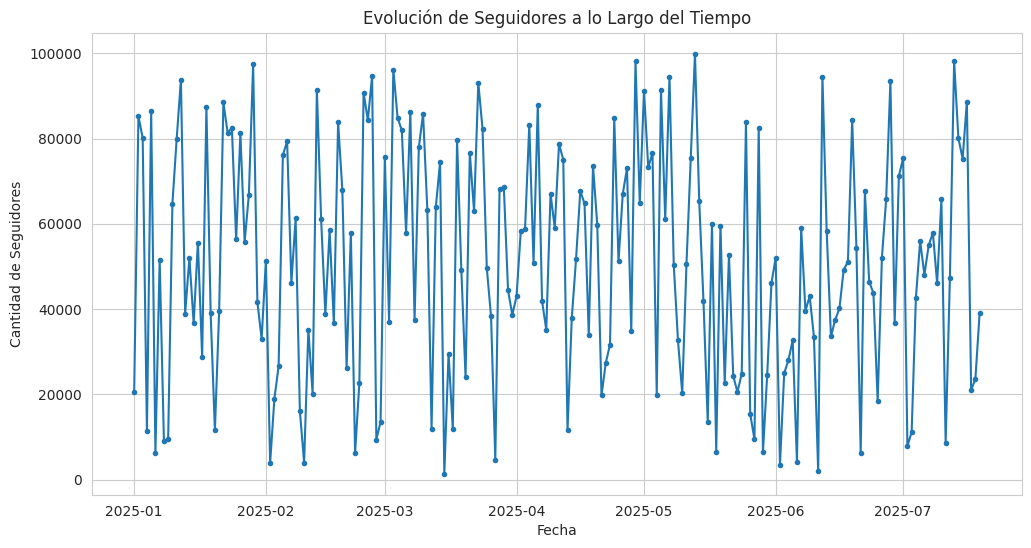

In [26]:
# Se importan las librerías para visualización.
import matplotlib.pyplot as plt
import seaborn as sns

# Se configura un estilo visual más bonito para los gráficos.
sns.set_style("whitegrid")

# --- GRÁFICO 1: Evolución de Seguidores ---

# Se crea el lienzo para el gráfico. `figsize` controla el tamaño (ancho, alto en pulgadas).
plt.figure(figsize=(12, 6))

# Se dibuja el gráfico de líneas.
# Eje X: la columna de fechas ('date').
# Eje Y: la columna de seguidores ('followers').
plt.plot(df['date'], df['followers'], marker='.', linestyle='-')

# Se añaden títulos para que el gráfico se entienda solo.
plt.title('Evolución de Seguidores a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Seguidores')

# Se muestra el gráfico.
plt.show()

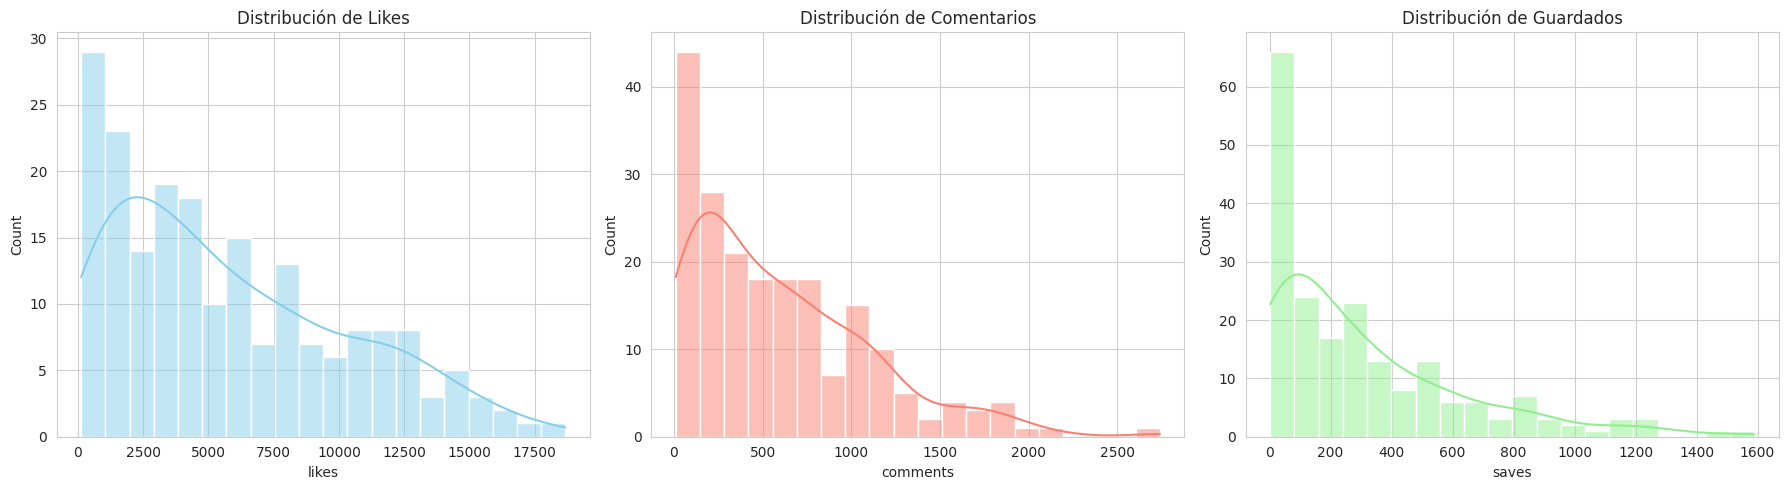

In [27]:
# --- GRÁFICO 2: Distribución de Métricas de Engagement ---

# Se crea una figura que contendrá varios sub-gráficos (subplots).
# `figsize` ajusta el tamaño total. `(1, 3)` significa 1 fila y 3 columnas de gráficos.
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# --- Histograma de Likes ---
sns.histplot(df['likes'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de Likes')

# --- Histograma de Comentarios ---
sns.histplot(df['comments'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribución de Comentarios')

# --- Histograma de Guardados ---
sns.histplot(df['saves'], bins=20, kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribución de Guardados')

# Se ajusta el layout para que no se superpongan los títulos
plt.tight_layout()
plt.show()

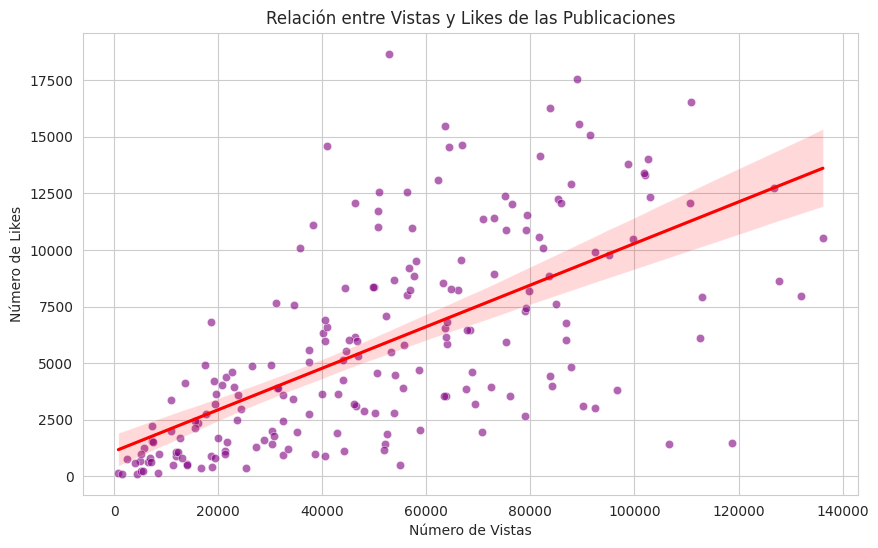

In [28]:
# --- GRÁFICO 3: Relación entre Vistas y Likes ---

# Se crea el lienzo del gráfico.
plt.figure(figsize=(10, 6))

# Se crea el gráfico de dispersión usando seaborn para un look más estilizado.
# `alpha=0.6` hace los puntos un poco transparentes para ver si hay superposiciones.
sns.scatterplot(x='views', y='likes', data=df, alpha=0.6, color='purple')

# Se añade una línea de regresión para ver la tendencia general más claramente.
sns.regplot(x='views', y='likes', data=df, scatter=False, color='red')

# Se añaden títulos
plt.title('Relación entre Vistas y Likes de las Publicaciones')
plt.xlabel('Número de Vistas')
plt.ylabel('Número de Likes')
plt.show()

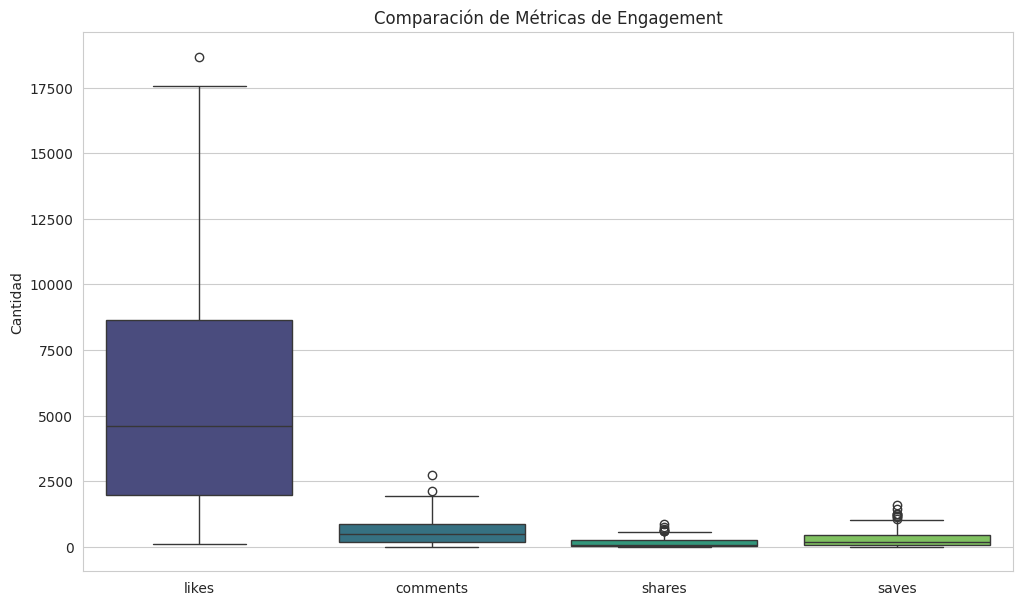

In [29]:
# --- GRÁFICO 4: Comparativa de Distribuciones con Diagramas de Caja ---

# Se seleccionan solo las columnas de engagement que se quieran comparar
engagement_metrics = df[['likes', 'comments', 'shares', 'saves']]

# Se crea el lienzo del gráfico
plt.figure(figsize=(12, 7))

# Se crea el diagrama de caja
sns.boxplot(data=engagement_metrics, palette='viridis')

# Se añaden títulos
plt.title('Comparación de Métricas de Engagement')
plt.ylabel('Cantidad')
plt.show()

/tmp/ipython-input-1486871823.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


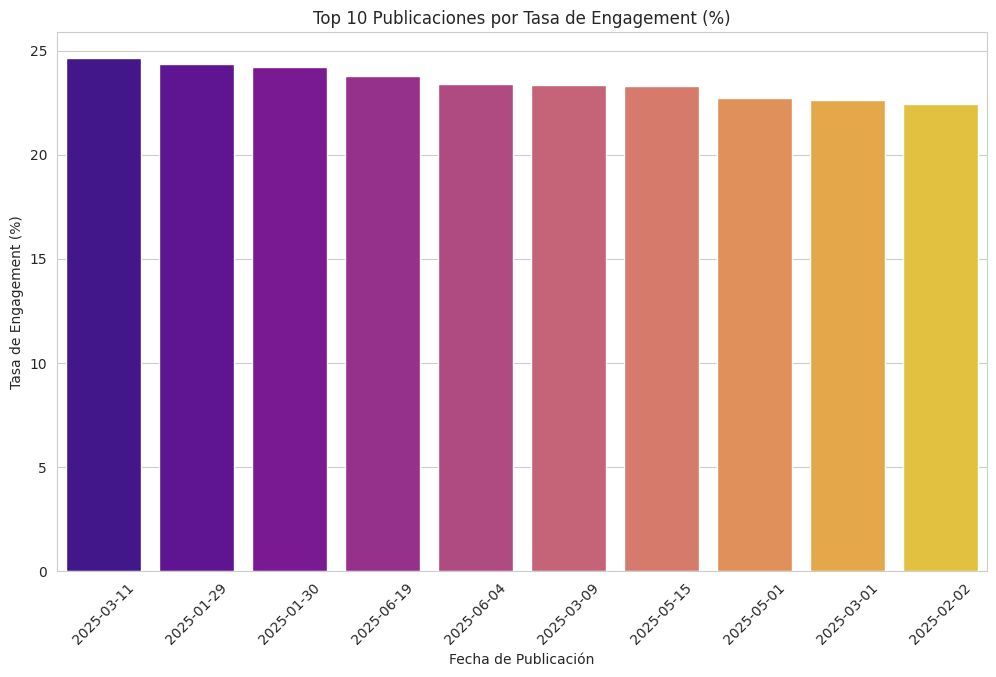

In [30]:
# --- GRÁFICO 5: Top 10 Publicaciones con Mayor Tasa de Engagement ---

# Primero, se ordena el DataFrame por la columna 'engagement_rate (%)' de mayor a menor.
df_sorted = df.sort_values(by='engagement_rate (%)', ascending=False)

# Luego, se seleccionan solo las primeras 10 filas de esa tabla ordenada.
top_10_posts = df_sorted.head(10)

# Se crea el lienzo del gráfico
plt.figure(figsize=(12, 7))

# Se crea el gráfico de barras.
# Para el eje X, usamos la fecha para identificar cada post.
# Para el eje Y, usamos la tasa de engagement.
# `strftime('%Y-%m-%d')` formatea la fecha para que sea más corta y legible.
sns.barplot(
    x=top_10_posts['date'].dt.strftime('%Y-%m-%d'),
    y=top_10_posts['engagement_rate (%)'],
    palette='plasma'
)

# Se añaden títulos
plt.title('Top 10 Publicaciones por Tasa de Engagement (%)')
plt.xlabel('Fecha de Publicación')
plt.ylabel('Tasa de Engagement (%)')
plt.xticks(rotation=45) # Rotamos las etiquetas del eje X para que no se solapen
plt.show()

/tmp/ipython-input-3138391828.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='content_type', y='engagement_rate (%)', data=df, palette='pastel')


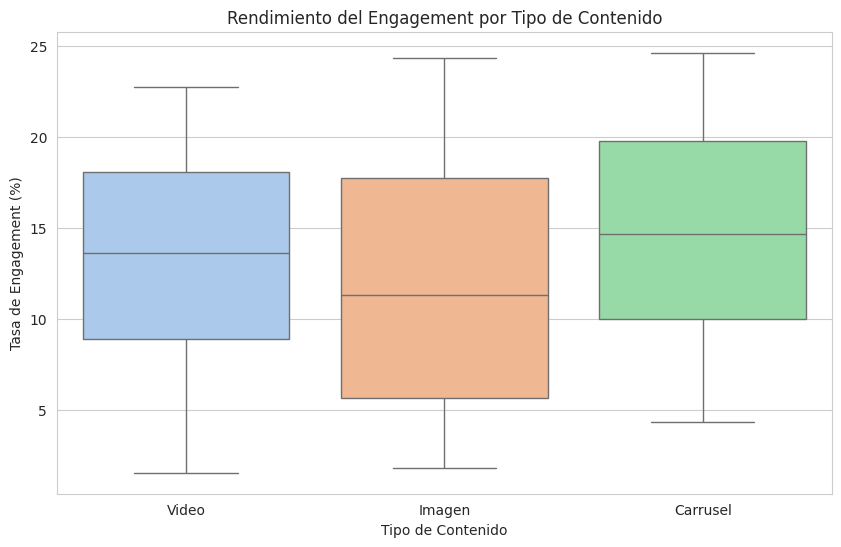

In [33]:
# --- GRÁFICO 6: Rendimiento por Tipo de Contenido ---

plt.figure(figsize=(10, 6))
sns.boxplot(x='content_type', y='engagement_rate (%)', data=df, palette='pastel')
plt.title('Rendimiento del Engagement por Tipo de Contenido')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Tasa de Engagement (%)')
plt.show()

/tmp/ipython-input-2321857192.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


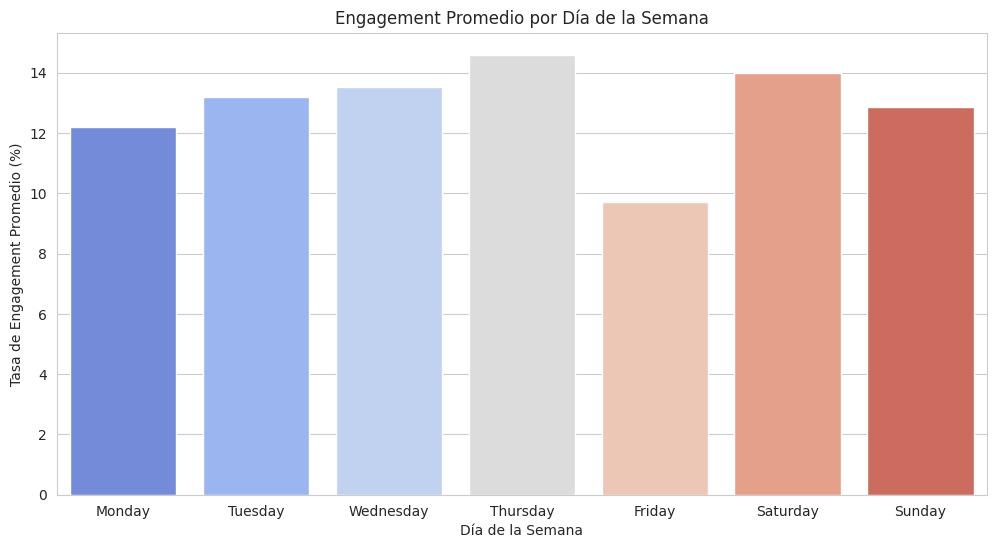

In [34]:
# --- GRÁFICO 7: Engagement Promedio por Día de la Semana ---

# Se ordenan los días de la semana para que aparezcan en el orden correcto en el gráfico
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))
sns.barplot(
    x='day_of_week',
    y='engagement_rate (%)',
    data=df,
    order=dias_ordenados,
    palette='coolwarm',
    estimator=np.mean, # Se muestra la media
    errorbar=None # Opcional: se quitan las barras de error para más claridad
)
plt.title('Engagement Promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Tasa de Engagement Promedio (%)')
plt.show()

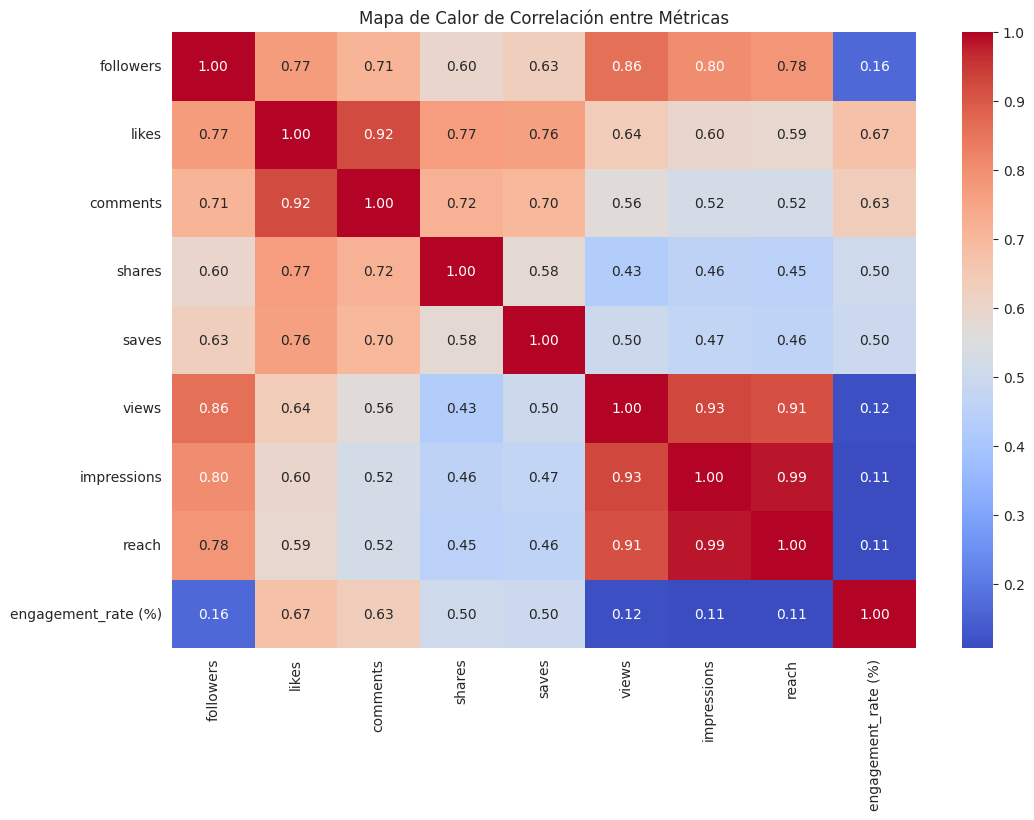

In [41]:
# --- GRÁFICO 8: Matriz de Correlación General ---

# Se selecciona solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Se calcula la matriz de correlación con el nuevo DataFrame
correlation_matrix = df_numerico.corr()

# Se genera el gráfico de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Métricas')
plt.show()